Categorical columns detected: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']

Training model: Decision Tree
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33609
           1       1.00      1.00      1.00     10992

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601


Confusion Matrix:
 [[33609     0]
 [    0 10992]]

Training model: Random Forest
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00   

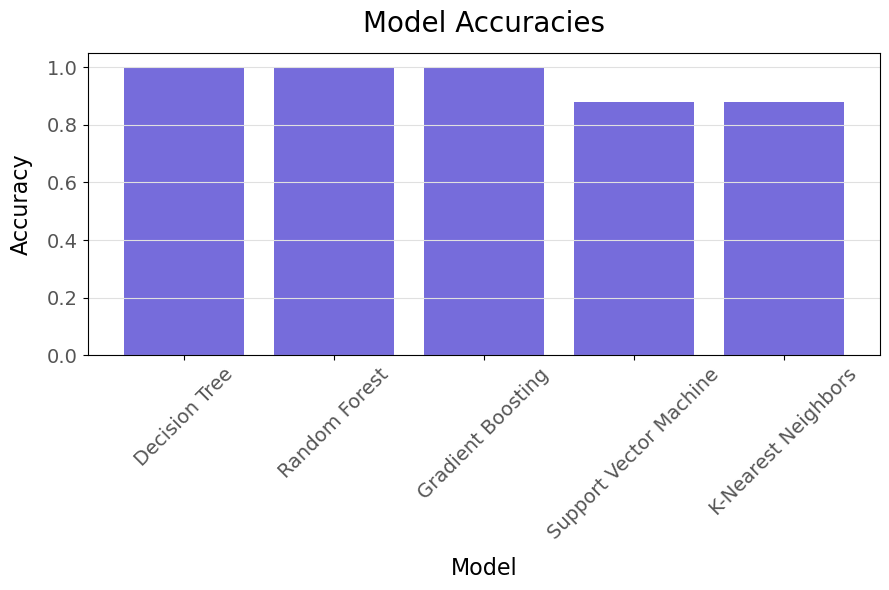

Done!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Added for handling missing values

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Load the dataset
df = pd.read_csv('Loan_Default.csv')

# Ensure 'Status' column exists
if 'Status' not in df.columns:
    raise ValueError("The dataset does not contain a 'Status' column.")

# Convert target column to integer if necessary
df['Status'] = df['Status'].astype(int)

# Identify feature columns (excluding LoanID and churn)
features = [col for col in df.columns if col not in ['ID', 'Status']]
X = df[features]
y = df['Status']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Check if there are categorical columns before applying encoding
if categorical_cols:
    print("Categorical columns detected:", categorical_cols)
else:
    print("No categorical columns detected.")

# Handle missing values by replacing NaN with 0 for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=0), numerical_cols),  # Replace NaN with 0
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dictionary to store model results
results = {}

# List of models to train
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': LinearSVC(random_state=42, max_iter=5000),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and test each model
for model_name, model in models.items():
    print(f'\nTraining model: {model_name}')
    
    # Build pipeline
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    
    # Fit the model
    pipe.fit(X_train, y_train)
    
    # Predict on test
    y_pred = pipe.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {acc:.4f}')
    print('\nClassification Report:\n', cr)
    print('\nConfusion Matrix:\n', cm)
    
    results[model_name] = {'accuracy': acc, 'classification_report': cr, 'confusion_matrix': cm}

# Visualize accuracies of different models
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]

plt.figure(figsize=(9,6))
plt.bar(model_names, accuracies, color='#766CDB')
plt.xlabel('Model', fontsize=16, labelpad=10)
plt.ylabel('Accuracy', fontsize=16, labelpad=10)
plt.title('Model Accuracies', fontsize=20, pad=15)
plt.xticks(rotation=45, fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
plt.grid(axis='y', color='#E0E0E0')
plt.tight_layout()
plt.show()

print('Done!')


## Summary of Insights

### High Performance Models:
- **Decision Tree, Random Forest, and Gradient Boosting** models achieved an accuracy of **100%**.
- This indicates they may be **overfitting** to the training dataset.

### Lower Performance Models:
- **SVM and KNN** showed reduced accuracy around **87%**.
- Precision and recall metrics indicate:
  - **SVM performs better** on classifying **Class 1**.
  - **SVM struggles** with correctly classifying **Class 0**.
